In [3]:
import os
import sys
import json
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from io import StringIO

sys.path.append(str(Path().resolve().parent))
from train.datasets import TitsSizeDataset
from train.datasets import InferenceDataset

In [20]:
meta_path = '/home/achernikov/CLS/DATA/datasets/tits_size.json'
root_path = '/home/achernikov/DATA/segmentation_tits_size'
badlist_path = '/home/achernikov/DATA/segmentation_tits_size/badlist.txt'

In [2]:
with open('/home/achernikov/CLS/DATA/datasets/background.json') as f:
    data = json.load(f)
df = pd.read_json(StringIO(data['data']))

df

path
0    024b71d1ae1476c4bc7b115ea9722f82.jpeg
1    e8589465c3976e15f1acd53806ef9dd6.jpeg
10   ebfe28755337d401a9bf1c8e3ee2b796.jpeg
100  b5adc25459bc46d33108debad7fdf50c.jpeg
101  c55a33ec28e1a0cb39c94eeead2b01eb.jpeg
..                                     ...
95   b4aacb21764b795c6d8ccab9c2622c50.jpeg
96   50e839ed31a732d3e1dc6ee52f330baf.jpeg
97   ade539592d3256b940d4ae1fdb625598.jpeg
98   57f8157e14a32b575e02942686673ebe.jpeg
99   86c03851c2f5a041b2e75fa5fa3c2f37.jpeg

[231 rows x 1 columns]

In [5]:
inf_ds = InferenceDataset(df, None)
inf_ds[1]

TypeError: expected str, bytes or os.PathLike object, not NoneType

In [2]:
with open('/home/achernikov/DATA/new_bg/background.json') as f:
    data = json.load(f)
orig_df = pd.read_json(StringIO(data['data']))
orig_df

path
0    840d8ee03a5848d0d806bf1931c221aa.jpeg
1    74f352d0da9fa96a6b294c375544d395.jpeg
10   41213d70aee4bb92a4fd06abf48e2889.jpeg
100  f32f05020a3170c56b834e529dfd20f3.jpeg
101  354ed4049a4514c23cceb8e73ba35bb2.jpeg
..                                     ...
95   a31ce3ed614f5406c41a703ab5dc21d0.jpeg
96   ad585fb271d41d7befc7c5ef22426afc.jpeg
97   d6af14db3f00dec816fe62177ec0b3a9.jpeg
98   b9414f213d1e02af82e605d26e75cc3c.jpeg
99   e712d0103520c49815745b8d576c1b39.jpeg

[231 rows x 1 columns]

In [3]:
# helper function for data visualization
def visualize(**images):
    """PLot images in one row."""
    n = len(images)
    plt.figure(figsize=(16, 5))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image)
    plt.show()

In [3]:
meta_path = '/home/achernikov/DATA/datasets/tits_size/tits_size.json'
root_path = '/home/achernikov/DATA/segmentation_tits_size'
badlist_path = '/home/achernikov/DATA/segmentation_tits_size/badlist.txt'

In [4]:
with open(meta_path) as f:
    data = json.load(f)
orig_df = pd.read_json(StringIO(data['data']))
print(orig_df.columns)
orig_df[orig_df['small tits'] == 1]

Index(['path', 'big tits', 'flat chested', 'huge tits', 'small tits'], dtype='object')


path  big tits  flat chested  \
12465  1926a2b44838aa132014402ad81f601f.jpeg         0             0   
12466  b0e0aa4d4933c1b296ac5da70a3160ec.jpeg         0             0   
12467  d31c3f01a260a6d5883b0c8dc4fac2da.jpeg         0             0   
12468  0016928e625521b4c7a289f98dc9b9b1.jpeg         0             0   
12469  0108a9760834e6d1c3c50015ec9297b3.jpeg         0             0   
...                                      ...       ...           ...   
18363  3687777041902cad10addfc9dd39a428.jpeg         0             0   
18364  37e7edaa8eb3ec8815a7cbff7fb27369.jpeg         0             0   
18365  c44b2d34c910ba28078bf29a7b59abf0.jpeg         0             0   
18366  db7edca3fd04cade386fec05a46bf48c.jpeg         0             0   
18367  8b19d02760971d55f0804c900cb40512.jpeg         0             0   

       huge tits  small tits  
12465          0           1  
12466          0           1  
12467          0           1  
12468          0           1  
12469          0           1  
...          ...         ...  
18363          0           1  
18364          0           1  
18365          0           1  
18366          0           1  
18367          0           1  

[5903 rows x 5 columns]

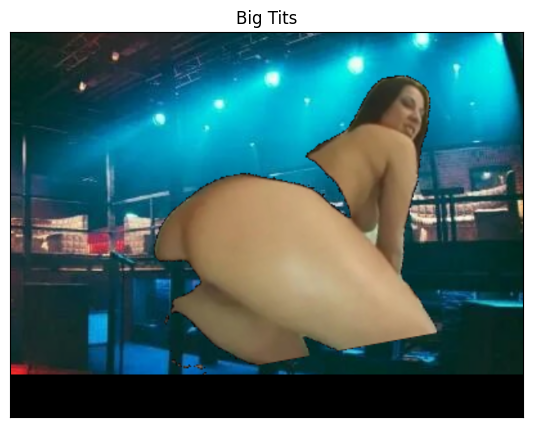

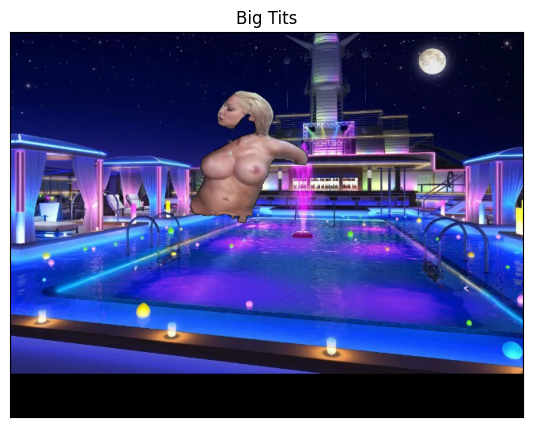

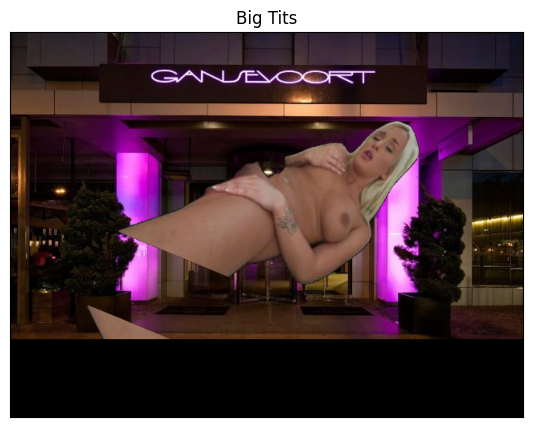

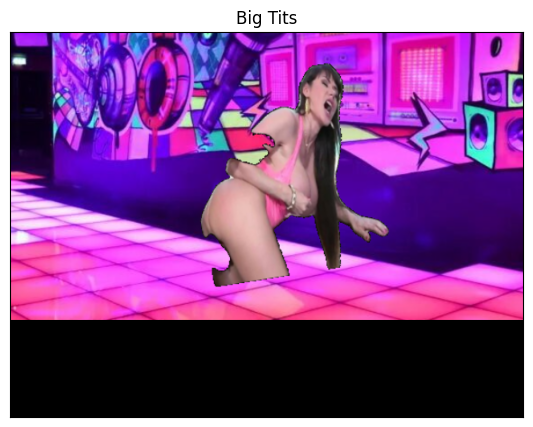

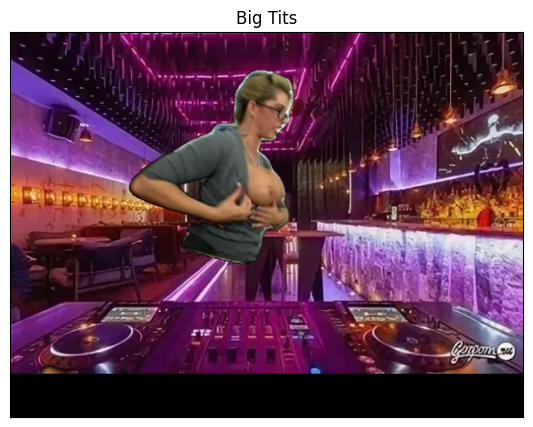

In [10]:
df = orig_df[orig_df['big tits'] == 1]

ds = TitsSizeDataset(data=df, root=root_path)
names = ds.data.columns.tolist()[1:]

for i in range(5):
    img, label = ds[i]
    cls_idx = label.argmax()
    name = names[cls_idx]
    img = img.permute(1, 2, 0).float().numpy()
    visualize(**{name: img})

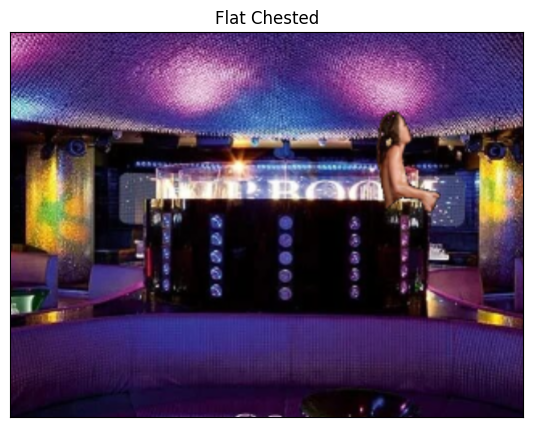

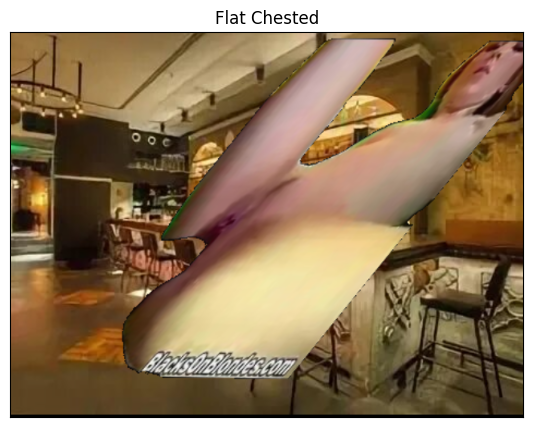

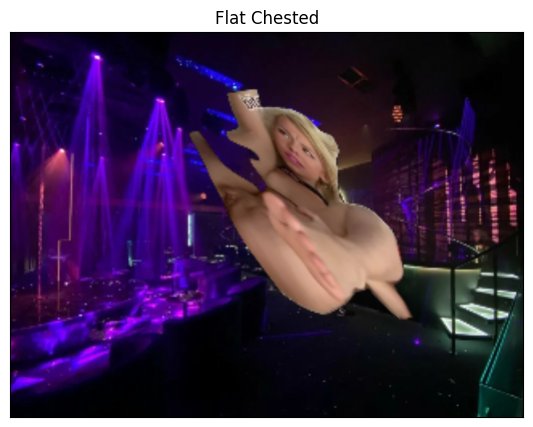

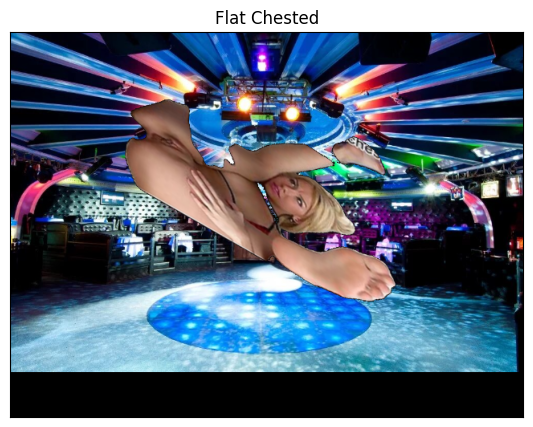

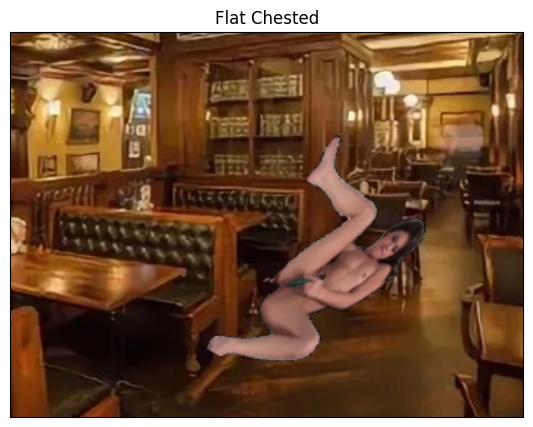

In [10]:
df = orig_df[orig_df['flat chested'] == 1]

ds = TitsSizeDataset(data=df, root=root_path)
names = ds.data.columns.tolist()[1:]

for i in range(5):
    img, label = ds[i]
    cls_idx = label.argmax()
    name = names[cls_idx]
    img = img.permute(1, 2, 0).float().numpy()
    visualize(**{name: img})

In [12]:
import numpy as np

trash_mask = np.ones((len(orig_df),), dtype='bool')
cols = orig_df.columns.tolist()

for i in range(1, len(cols)):
    col = cols[i]
    trash_mask &= (orig_df[col] == 0).values
trash_data = orig_df[trash_mask]

ds = TitsSizeDataset(data=trash_data, root=root_path, badlist_path=badlist_path)


In [13]:
len(ds.data[ds.data['trash_bg'] == 1])

7717

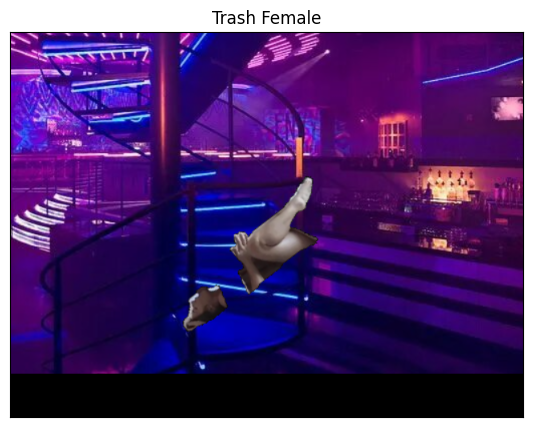

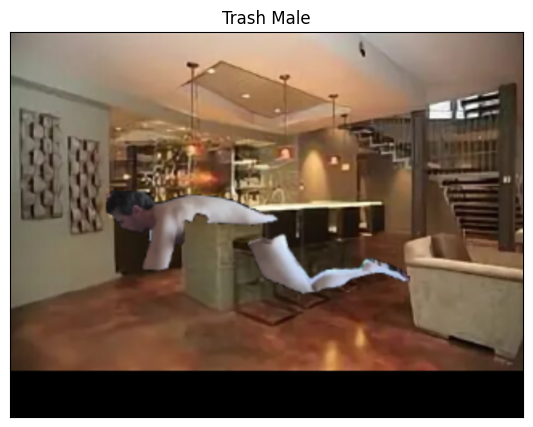

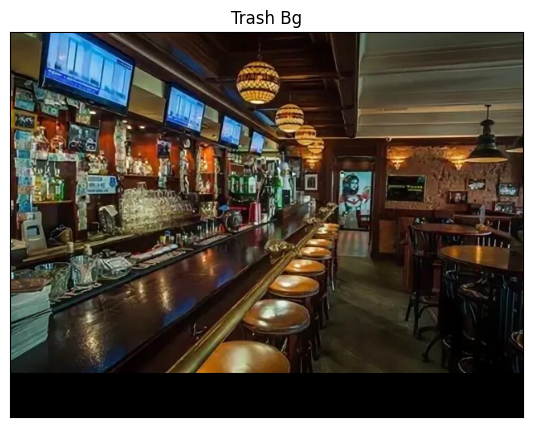

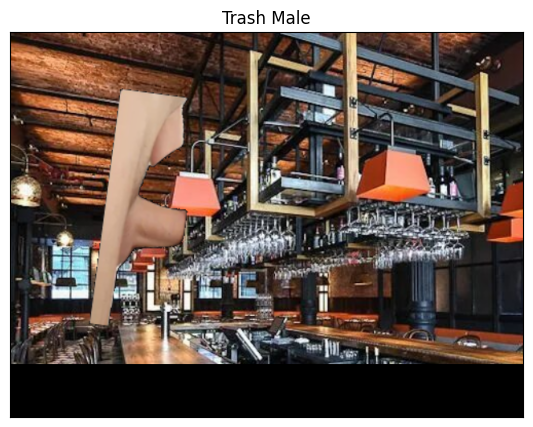

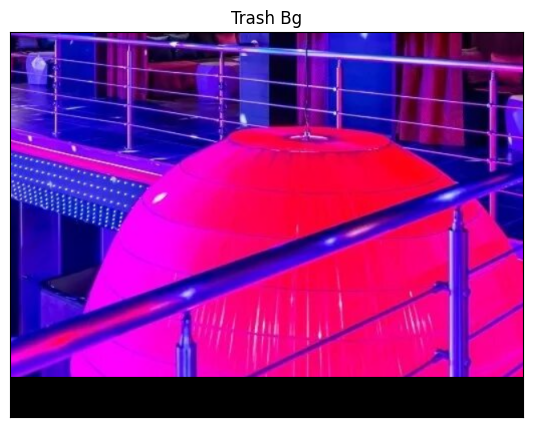

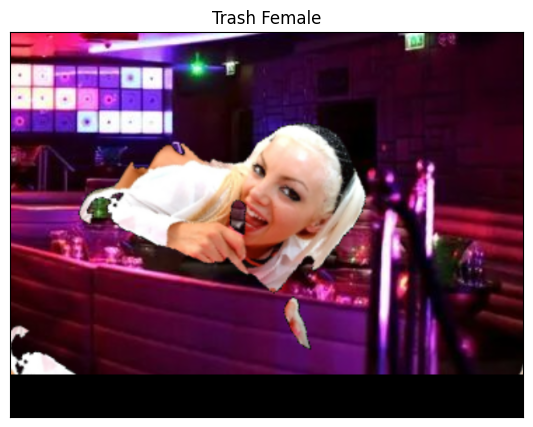

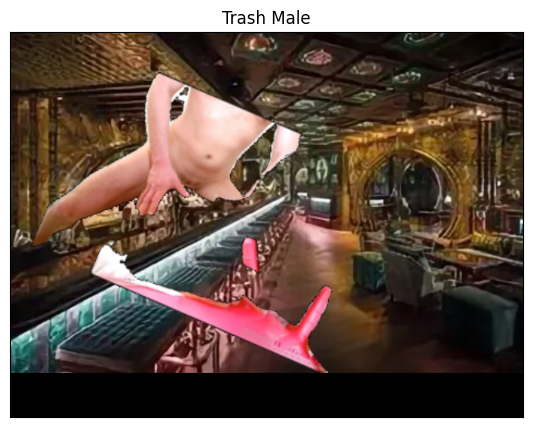

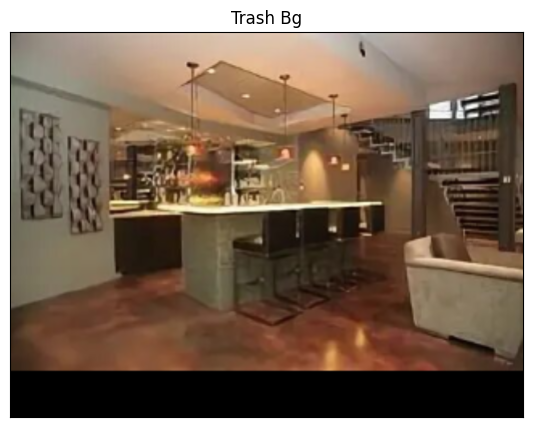

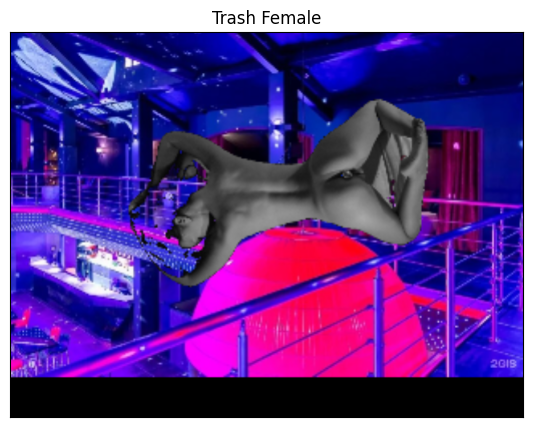

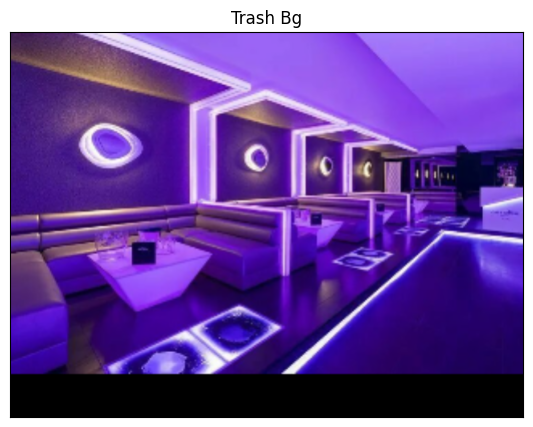

In [14]:
names = ds.data.columns.tolist()[1:]

for i in range(10, 20):
    img, label = ds[i]
    cls_idx = label.argmax()
    name = names[cls_idx]
    img = img.permute(1, 2, 0).float().numpy()
    visualize(**{name: img})

In [12]:
import cProfile
cProfile.run('TitsSizeDataset(data=trash_data, root=root_path)', 'stats')

In [14]:
import pstats
from pstats import SortKey
p = pstats.Stats('stats')
#p.strip_dirs().sort_stats(-1).print_stats()
p.sort_stats(SortKey.CUMULATIVE).print_stats(.5)

Fri Oct  6 12:16:57 2023    stats

         1143831133 function calls (1143745069 primitive calls) in 183.017 seconds

   Ordered by: cumulative time
   List reduced from 510 to 255 due to restriction <0.5>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000  183.017  183.017 {built-in method builtins.exec}
        1    0.000    0.000  183.017  183.017 <string>:1(<module>)
        1    0.000    0.000  183.017  183.017 /home/achernikov/CLS/classification/train/datasets.py:319(__init__)
        1    0.043    0.043  183.017  183.017 /home/achernikov/CLS/classification/train/datasets.py:330(prepare_data)
    15686    0.012    0.000  182.760    0.012 /usr/lib/python3.10/glob.py:13(glob)
    26131    0.029    0.000  182.735    0.007 /usr/lib/python3.10/glob.py:53(_iglob)
    15686    0.016    0.000  182.630    0.012 /usr/lib/python3.10/glob.py:93(_glob1)
    15686   17.708    0.001   95.126    0.006 /usr/lib/python3.10/glob.py:162(_listdir)
  

In [32]:
import pandas as pd
import json
with open('/home/achernikov/DATA/datasets/sex_position/sex_positions.json') as f:
    data = json.load(f)
df = pd.read_json(data['data'])
df

/tmp/ipykernel_641273/3361456017.py:5: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_json(data['data'])


0        c65e5cc8ce4b232c3b39411b09fc57f0.jpeg
1        80279792ae8f037bc51e1f2386487998.jpeg
2        29e94c8fc081153e6681c96a4df7a63f.jpeg
3        25e87340b207e071bbcfa3618599a00f.jpeg
4        8a4b2f38811cd3a606ed929b2a6ff0cb.jpeg
                         ...                  
27776    e6efbc00845bca88ee25f84b11a70fcc.jpeg
27777    ee223f3f6c90a675b680e4b640d445d3.jpeg
27778    867ee36efa23c356732ad9745b51d150.jpeg
27779    9618b6f63230d42764f37f01d5cd13d1.jpeg
27780    a0abeed2e36707df7477c82016c2e26a.jpeg
Name: path, Length: 27781, dtype: object

In [28]:
import numpy as np

mask = np.ones((len(df),), dtype='bool')
cols = df.columns.tolist()
cur_class = -1
for i in range(1, len(cols)):
    col = cols[i]
    value = 1 if (i - 1) == cur_class and cur_class >= 0 else 0
    mask &= (df[col] == value).values

df[mask].index

Index([10902, 10903, 10904, 10905, 10906, 10907, 10908, 10909, 10910, 10911,
       ...
       24376, 24377, 24378, 24379, 24380, 24381, 24382, 24383, 24384, 24385],
      dtype='int64', length=13484)

In [42]:
df = pd.DataFrame([{'a': '1', 'b': 1}, {'a': '2', 'b': 1}])


df.index = df[df.columns[0]]
badlist = ['-1', '1']
clear_badlist = []
for b in badlist:
    if b in df.index:
        clear_badlist.append(b)

print(clear_badlist)

d2 = df.drop(clear_badlist)
df

['1']


a  b
a      
1  1  1
2  2  1